# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [199]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [200]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [201]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [202]:
# Create a Beautiful Soup Object
html = browser.html
mars2_soup = soup(html, "html.parser")

In [203]:
# Extract all rows of data
# Create an empty list
# Loop through the scraped data to create a list of rows

In [204]:
# Create empty list
mars_weather = []

In [205]:
# Select the table
table = mars2_soup.find("table", class_="table")

In [206]:
# Store all rows from table into one variable
for mars_weather_data in table.find_all("tbody"):
    rows = mars_weather_data.find_all("tr", class_="data-row")
    # Loop through table to scrape the data
    for row in rows:
        id = row.find_all("td")[0].text
        terrestrial_date = row.find_all("td")[1].text
        sol = row.find_all("td")[2].text
        ls = row.find_all("td")[3].text
        month = row.find_all("td")[4].text
        min_temp = row.find_all("td")[5].text
        pressure = row.find_all("td")[6].text
        # Add scraped data to list
        mars_weather.append({
            "id": id,
            "terrestrial_date": terrestrial_date,
            "sol": sol,
            "ls": ls,
            "month": month,
            "min_temp": min_temp,
            "pressure": pressure
        })
mars_weather

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [207]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df_mars_data = pd.DataFrame(mars_weather)

In [208]:
# Confirm DataFrame was created successfully
df_mars_data

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [209]:
# Examine data type of each column
check_dt = df_mars_data.dtypes
print(check_dt)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [210]:
# DELETE

df_mars_data.to_csv("Resources/marsdata.csv", index=False, header=True)

In [211]:
df_mars_data = df_mars_data.astype({
                    "id": "int",
                    "terrestrial_date": ("datetime64").format("%y%m%d"),
                    "sol": "int",
                    "ls": "int",
                    "month": "int",
                    "min_temp": "float",
                    "pressure": "float"
})
df_mars_data

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [212]:
# Confirm type changes were successful by examining data types again
check_dt = df_mars_data.dtypes
print(check_dt)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [213]:
# How many months are there on Mars?
month_count = df_mars_data["month"].nunique()
print(f"There are {month_count} months in the Curiousity dataset")

There are 12 months in the Curiousity dataset


In [214]:
# 2. How many Martian days' worth of data are there?
sol_count = df_mars_data["sol"].count()
print(f"There are {sol_count} Martian days worth of data.")


There are 1867 Martian days worth of data.


In [215]:
# 3. What is the average low temperature by month?
df_average_low_temp = pd.DataFrame(df_mars_data.groupby(["month"])["min_temp"].mean())
df_average_low_temp

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


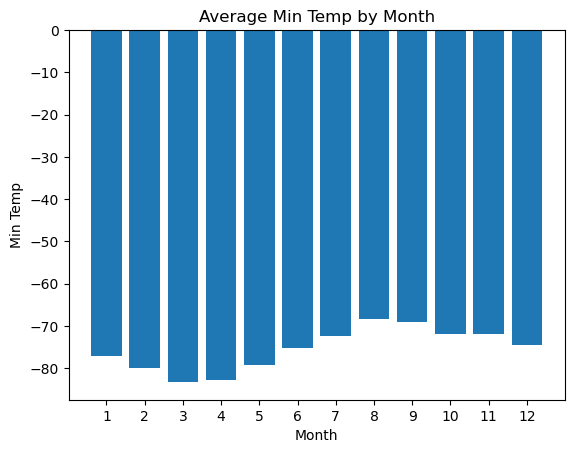

In [216]:
# Plot the average temperature by month
temp=range(1,13)
plt.bar(temp, df_average_low_temp["min_temp"])

plt.title("Average Min Temp by Month")
plt.xlabel("Month")
plt.ylabel("Min Temp")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

plt.show()

In [217]:
# Identify the coldest and hottest months in Curiosity's location
df_average_low_temp = pd.DataFrame(df_mars_data.groupby(["month"])["min_temp"].mean()).sort_values(by="min_temp")
df_average_low_temp


,min_temp
month,
3,-83.307292
4,-82.747423
2,-79.932584
5,-79.308725
1,-77.160920
6,-75.299320
12,-74.451807
7,-72.281690
11,-71.985507


# Based on the data above, the coldest month, on average, is month 3 while the hottest month is month 8.



In [218]:
# 4. Average pressure by Martian month
df_average_pressure = pd.DataFrame(df_mars_data.groupby(["month"])["pressure"].mean()).sort_values(by="pressure")
df_average_pressure


,pressure
month,
6,745.054422
5,748.557047
7,795.105634
4,806.329897
12,842.156627
11,857.014493
1,862.488506
8,873.829787
3,877.322917


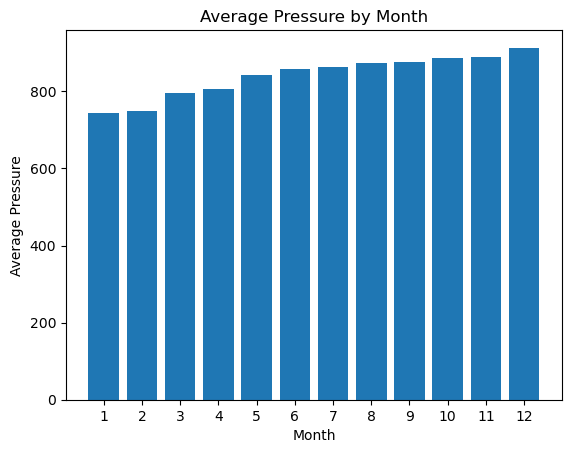

In [219]:
# Plot the average pressure by month
months=range(1,13)
plt.bar(months, df_average_pressure["pressure"])

plt.title("Average Pressure by Month")
plt.xlabel("Month")
plt.ylabel("Average Pressure")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

plt.show()

## Based on the data and chart above, Month 6 has the lowest pressure is, on average, while Month 9 has the highest pressure.

In [220]:
# 5. How many terrestrial (earth) days are there in a Martian year?

Text(0, 0.5, 'Min Temp')

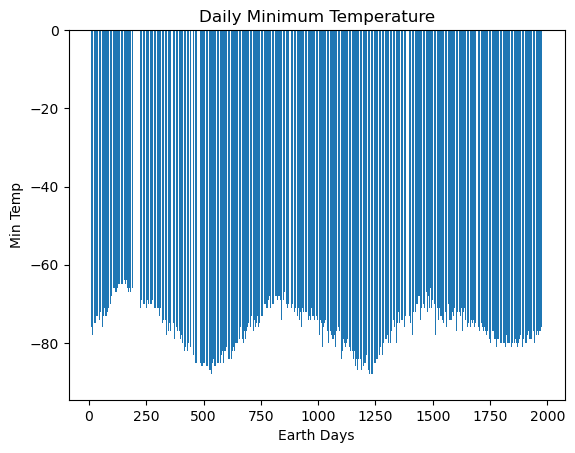

In [221]:
plt.bar(df_mars_data["sol"],df_mars_data["min_temp"])

plt.title("Daily Minimum Temperature")
plt.xlabel("Earth Days")
plt.ylabel("Min Temp")

## Peak to peak (~525-1225) in the chart above shows approximately 700 earth days for the 1867 days of Curiousity's visit.  There are 687 days in a martian year according to space.com: https://www.space.com/mars-new-year-2021-martian-year-36

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [222]:
# Write the data to a CSV
df_mars_data.to_csv("Resources/MarsDataFrame.csv", index=False, header=True)

In [223]:
browser.quit()